In [1]:
import pandas as pd
import psycopg2
import os

try:
    conn = psycopg2.connect(
        dbname=os.getenv("DB_NAME"),
        user=os.getenv("DB_USER"),
        password=os.getenv("DB_PASSWORD"),
        host=os.getenv("DB_HOST"),
        port=os.getenv("DB_PORT")
    )
    print("Connected to PostgreSQL successfully!")
except psycopg2.Error as e:
    print(f"Error connecting to PostgreSQL: {e}")

Connected to PostgreSQL successfully!


In [2]:
sql_query = """SELECT
    nu_ano,
    co_municipio_prova,
    nu_sequencial,
    no_municipio_prova,
    co_uf_prova,
    sg_uf_prova,
    nome_uf_prova,
    municipio_capital_uf_prova,
    regiao_codigo_prova,
    regiao_nome_prova,
    co_escola,
    co_uf_esc,
    sg_uf_esc,
    co_municipio_esc,
    no_municipio_esc,
    tp_localizacao_esc,
    tp_sit_func_esc,
    nota_cn_ciencias_da_natureza AS nota_cn, -- Simplificando nomes longos
    nota_ch_ciencias_humanas AS nota_ch,
    nota_lc_linguagens_e_codigos AS nota_lc,
    nota_mt_matematica AS nota_mt,
    nota_redacao,
    nota_media_5_notas,
    tp_lingua,
    tp_status_redacao,
    tp_dependencia_adm_esc,
    
    -- Coluna de Classificação da Rede de Ensino
    CASE tp_dependencia_adm_esc
       WHEN 'Estadual' THEN 'Pública'
       WHEN 'Federal' THEN 'Pública'
       WHEN 'Privada' THEN 'Privada'
       ELSE 'Não Classificado' 
    END AS Rede_Ensino_Classificada

FROM
    public.ed_enem_2024_resultados

WHERE 
    co_municipio_esc IN (
        '3104502', '3109303', '3109451', '3170404', 
        '5200100', '5300108', '5222203', '5200175', 
        '5200258', '5200308', '5200605', '5200803', 
        '5203203', '5222302', '5204003', '5205307', 
        '5205497', '5205513', '5205802', '5206206', 
        '5207907', '5208004', '5208608', '5213053', 
        '5214606', '5215231', '5215603', '5217302', 
        '5217609', '5219753', '5220009', '5220686', 
        '5221858'
    );
        """

df = pd.io.sql.read_sql_query(sql_query, conn)
# Now data is a pandas dataframe having the results of above query.
df.head()


/tmp/ipykernel_18805/177274029.py:54: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.io.sql.read_sql_query(sql_query, conn)


,nu_ano,co_municipio_prova,nu_sequencial,no_municipio_prova,co_uf_prova,sg_uf_prova,nome_uf_prova,municipio_capital_uf_prova,regiao_codigo_prova,regiao_nome_prova,...,nota_cn,nota_ch,nota_lc,nota_mt,nota_redacao,nota_media_5_notas,tp_lingua,tp_status_redacao,tp_dependencia_adm_esc,rede_ensino_classificada
0,2024,3170404,4419,Unaí,31,MG,Minas Gerais,Não,3,Sudeste,...,531.6,537.8,549.3,508.3,760.0,577.40,Inglês,Sem problemas ...,Estadual,Pública
1,2024,3170404,5119,Unaí,31,MG,Minas Gerais,Não,3,Sudeste,...,620.2,653.9,629.5,694.8,820.0,683.68,Inglês,Sem problemas ...,Privada,Privada
2,2024,3170404,5396,Unaí,31,MG,Minas Gerais,Não,3,Sudeste,...,519.5,552.4,538.4,384.3,580.0,514.92,Inglês,Sem problemas ...,Estadual,Pública
3,2024,3170404,5629,Unaí,31,MG,Minas Gerais,Não,3,Sudeste,...,NaN,365.6,391.1,NaN,400.0,NaN,Espanhol,Sem problemas ...,Estadual,Pública
4,2024,3170404,6050,Unaí,31,MG,Minas Gerais,Não,3,Sudeste,...,432.1,446.6,474.6,446.1,580.0,475.88,Espanhol,Sem problemas ...,Estadual,Pública


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36496 entries, 0 to 36495
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nu_ano                      36496 non-null  object 
 1   co_municipio_prova          36496 non-null  object 
 2   nu_sequencial               36496 non-null  object 
 3   no_municipio_prova          36496 non-null  object 
 4   co_uf_prova                 36496 non-null  object 
 5   sg_uf_prova                 36496 non-null  object 
 6   nome_uf_prova               36496 non-null  object 
 7   municipio_capital_uf_prova  36496 non-null  object 
 8   regiao_codigo_prova         36496 non-null  object 
 9   regiao_nome_prova           36496 non-null  object 
 10  co_escola                   36496 non-null  object 
 11  co_uf_esc                   36496 non-null  object 
 12  sg_uf_esc                   36496 non-null  object 
 13  co_municipio_esc            364

In [4]:
df.describe()

,nota_cn,nota_ch,nota_lc,nota_mt,nota_redacao,nota_media_5_notas
count,28713.000000,30122.000000,30122.000000,28713.000000,30122.00000,28626.000000
mean,496.400561,511.318804,527.505428,526.253686,635.66629,543.109063
std,79.389732,92.289567,68.523113,115.006538,204.81812,89.667808
min,0.000000,0.000000,0.000000,0.000000,0.00000,155.580000
25%,433.700000,449.100000,489.100000,430.700000,540.00000,481.365000
50%,491.200000,515.500000,533.300000,497.000000,640.00000,536.870000
75%,554.000000,574.800000,574.200000,608.200000,780.00000,604.000000
max,828.900000,819.700000,777.400000,961.900000,980.00000,836.720000


In [5]:
df_preenchida = df.dropna()
df_preenchida.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28626 entries, 0 to 36495
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nu_ano                      28626 non-null  object 
 1   co_municipio_prova          28626 non-null  object 
 2   nu_sequencial               28626 non-null  object 
 3   no_municipio_prova          28626 non-null  object 
 4   co_uf_prova                 28626 non-null  object 
 5   sg_uf_prova                 28626 non-null  object 
 6   nome_uf_prova               28626 non-null  object 
 7   municipio_capital_uf_prova  28626 non-null  object 
 8   regiao_codigo_prova         28626 non-null  object 
 9   regiao_nome_prova           28626 non-null  object 
 10  co_escola                   28626 non-null  object 
 11  co_uf_esc                   28626 non-null  object 
 12  sg_uf_esc                   28626 non-null  object 
 13  co_municipio_esc            28626 no

In [6]:
36496-28626

7870

A perda de linhas foi de 7870

In [7]:
df.columns

Index(['nu_ano', 'co_municipio_prova', 'nu_sequencial', 'no_municipio_prova',
       'co_uf_prova', 'sg_uf_prova', 'nome_uf_prova',
       'municipio_capital_uf_prova', 'regiao_codigo_prova',
       'regiao_nome_prova', 'co_escola', 'co_uf_esc', 'sg_uf_esc',
       'co_municipio_esc', 'no_municipio_esc', 'tp_localizacao_esc',
       'tp_sit_func_esc', 'nota_cn', 'nota_ch', 'nota_lc', 'nota_mt',
       'nota_redacao', 'nota_media_5_notas', 'tp_lingua', 'tp_status_redacao',
       'tp_dependencia_adm_esc', 'rede_ensino_classificada'],
      dtype='object')

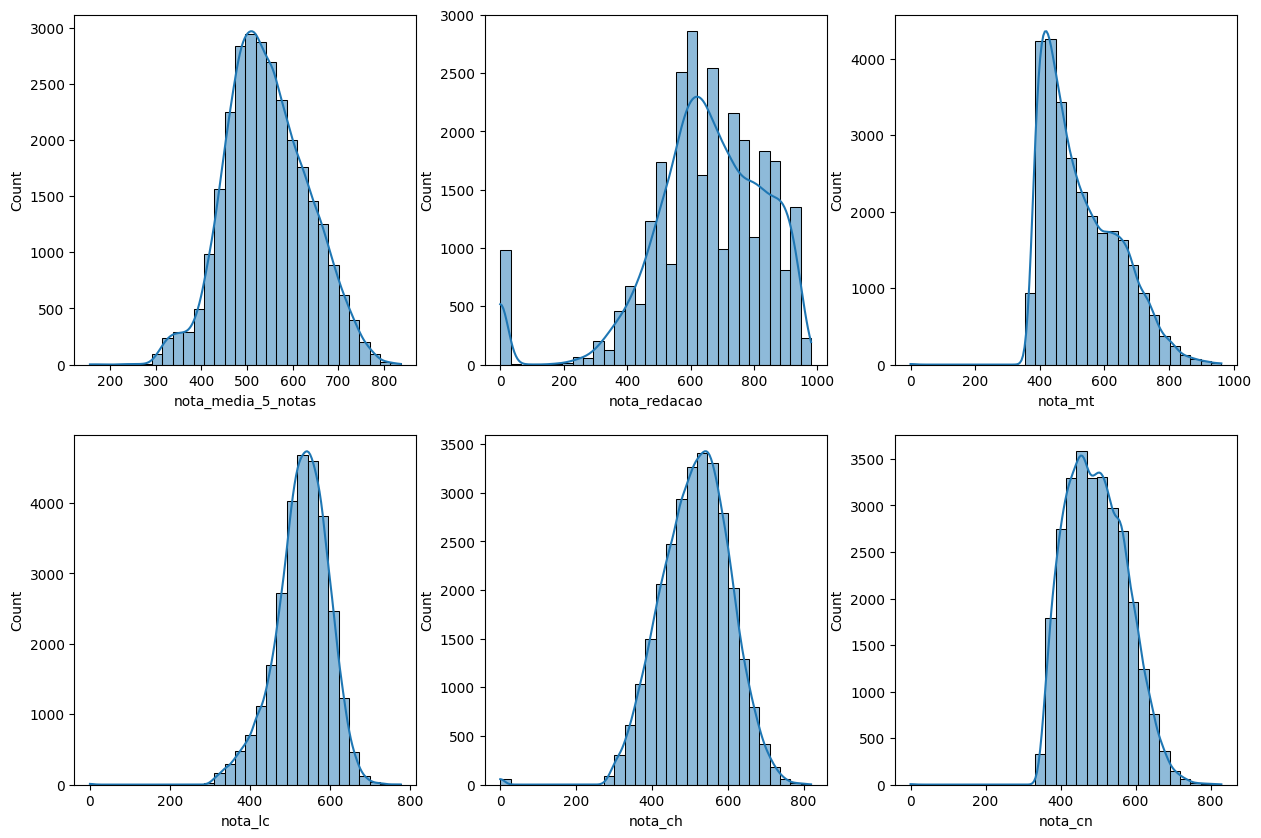

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df_preenchida['nota_media_5_notas'], bins=30, kde=True, ax=axes[0, 0])
sns.histplot(df_preenchida['nota_redacao'], bins=30, kde=True, ax=axes[0, 1])
sns.histplot(df_preenchida['nota_mt'], bins=30, kde=True, ax=axes[0, 2])
sns.histplot(df_preenchida['nota_lc'], bins=30, kde=True, ax=axes[1, 0])
sns.histplot(df_preenchida['nota_ch'], bins=30, kde=True, ax=axes[1, 1])
sns.histplot(df_preenchida['nota_cn'], bins=30, kde=True, ax=axes[1, 2])

plt.show()

/tmp/ipykernel_18805/3326649124.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75, horizontalalignment='right')


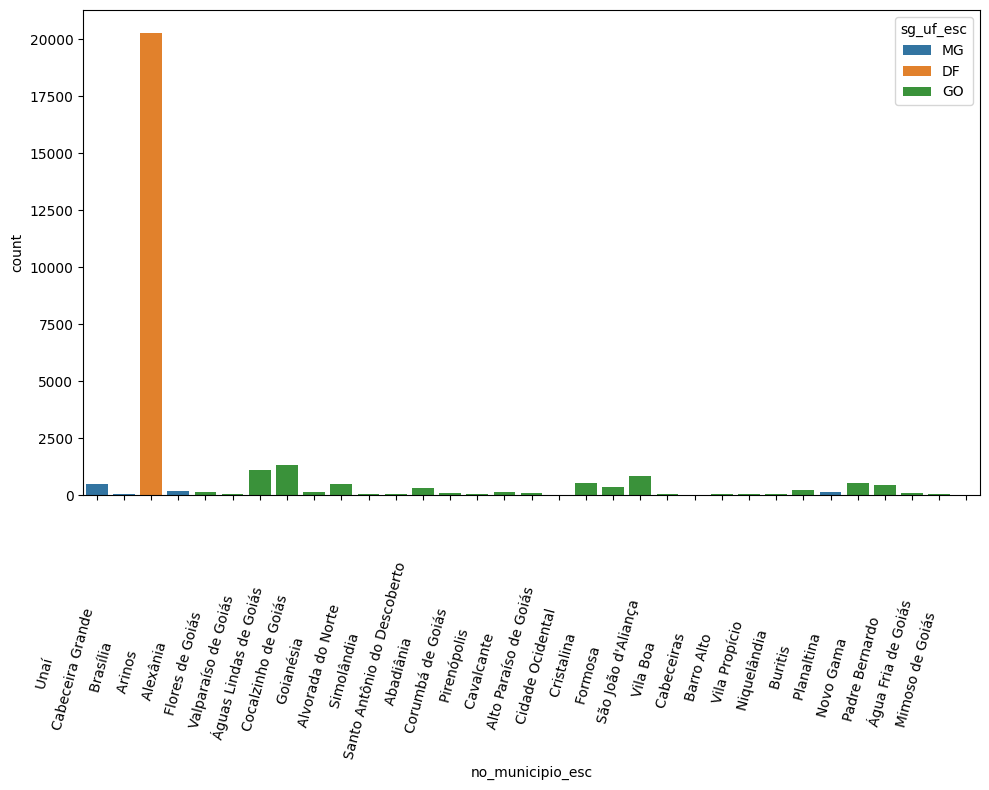

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='no_municipio_esc', data=df_preenchida, ax=ax, hue='sg_uf_esc')

ax.set_xticklabels(ax.get_xticklabels(), rotation=75, horizontalalignment='right')
fig.tight_layout()


In [11]:
df_preenchida["nu_ano"].value_counts()

nu_ano
2024    28626
Name: count, dtype: int64

<Axes: xlabel='tp_dependencia_adm_esc', ylabel='count'>

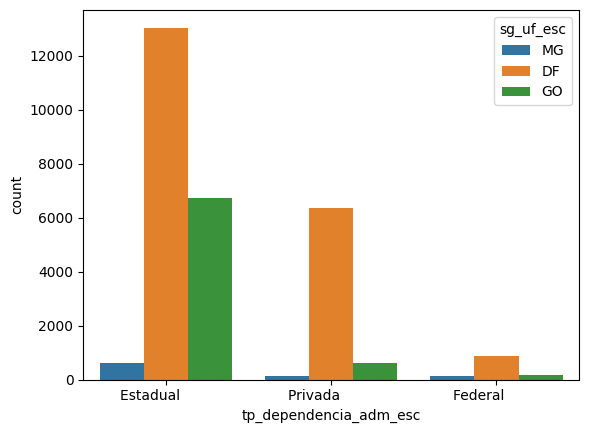

In [12]:
sns.countplot(x='tp_dependencia_adm_esc', data=df_preenchida, hue='sg_uf_esc')

<Axes: xlabel='tp_localizacao_esc', ylabel='count'>

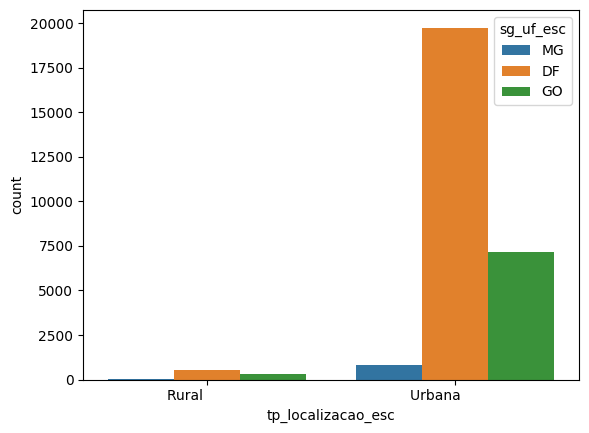

In [13]:
sns.countplot(x='tp_localizacao_esc', data=df_preenchida, hue='sg_uf_esc')

In [14]:
df_preenchida.columns

Index(['nu_ano', 'co_municipio_prova', 'nu_sequencial', 'no_municipio_prova',
       'co_uf_prova', 'sg_uf_prova', 'nome_uf_prova',
       'municipio_capital_uf_prova', 'regiao_codigo_prova',
       'regiao_nome_prova', 'co_escola', 'co_uf_esc', 'sg_uf_esc',
       'co_municipio_esc', 'no_municipio_esc', 'tp_localizacao_esc',
       'tp_sit_func_esc', 'nota_cn', 'nota_ch', 'nota_lc', 'nota_mt',
       'nota_redacao', 'nota_media_5_notas', 'tp_lingua', 'tp_status_redacao',
       'tp_dependencia_adm_esc', 'rede_ensino_classificada'],
      dtype='object')

In [17]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score




df_final = df_preenchida[['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao', 'rede_ensino_classificada']].copy()

# --- 2. PRÉ-PROCESSAMENTO E PREPARAÇÃO DOS DADOS ---

# 2.1. Variáveis Preditivas (X) e Variável Alvo (y)
X = df_final[['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']]

# 2.2. Codificação da Variável Alvo: Privada=1, Pública=0
y = df_final['rede_ensino_classificada'].map({'Pública': 0, 'Privada': 1})

# 2.3. Divisão em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2.4. Escalonamento (Standardization)
# A regressão logística se beneficia muito da normalização/escalonamento das variáveis de entrada.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 3. CONSTRUÇÃO E TREINAMENTO DO MODELO LOGIT ---

# Inicializa o modelo de Regressão Logística (Logit)
# C=1.0 é o inverso da força de regularização (menor C = mais regularização).
model_logit = LogisticRegression(solver='liblinear', C=1.0, random_state=42)

# Treina o modelo
model_logit.fit(X_train_scaled, y_train)


# --- 4. AVALIAÇÃO DO MODELO ---

print("\n--- Resultados do Modelo Logit Frequentista ---")

# 4.1. Previsões
y_pred = model_logit.predict(X_test_scaled)
y_proba = model_logit.predict_proba(X_test_scaled)[:, 1]

# 4.2. Métricas de Desempenho
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Acurácia no Conjunto de Teste: {accuracy:.4f}")
print(f"AUC-ROC no Conjunto de Teste: {roc_auc:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Pública (0)', 'Privada (1)']))


# --- 5. INTERPRETAÇÃO DOS COEFICIENTES (PESOS) ---

print("\n--- Coeficientes do Modelo Logit ---")

# Criamos uma série com os coeficientes e os nomes das features
coef_df = pd.Series(model_logit.coef_[0], index=X_train.columns)
intercept = model_logit.intercept_[0]

print(f"Intercepto (Log-Odds Base): {intercept:.4f}")
print("Pesos (Log-Odds) para as Notas Padronizadas:")
print(coef_df.to_string())

print("\n* Interpretação do Coeficiente (Exemplo):")
print(f"Para cada 1 desvio-padrão a mais em Matemática, a chance (odds) de ser de escola Privada (Y=1) aumenta por um fator de {np.exp(coef_df['nota_mt']):.3f} (mantendo a Redação constante).")


--- Resultados do Modelo Logit Frequentista ---
Acurácia no Conjunto de Teste: 0.8149
AUC-ROC no Conjunto de Teste: 0.8241

Relatório de Classificação:
              precision    recall  f1-score   support

 Pública (0)       0.84      0.93      0.88      6468
 Privada (1)       0.69      0.45      0.55      2120

    accuracy                           0.81      8588
   macro avg       0.77      0.69      0.71      8588
weighted avg       0.80      0.81      0.80      8588


--- Coeficientes do Modelo Logit ---
Intercepto (Log-Odds Base): -1.5078
Pesos (Log-Odds) para as Notas Padronizadas:
nota_cn         0.580195
nota_ch         0.141446
nota_lc         0.034374
nota_mt         0.413639
nota_redacao    0.539091

* Interpretação do Coeficiente (Exemplo):
Para cada 1 desvio-padrão a mais em Matemática, a chance (odds) de ser de escola Privada (Y=1) aumenta por um fator de 1.512 (mantendo a Redação constante).


In [19]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel, install_cmdstan
from sklearn.preprocessing import StandardScaler # Import necessário
import os

# ... (Função create_simulated_df e carregamento de dados) ...
# (Assumindo que X_scaled, y, e df já estão definidos)

# --- 2. Geração do Modelo Stan (CORRIGIDO) ---

stan_code_fixed = """
// logit_rede_ensino.stan (Sintaxe Corrigida)

data {
  int<lower=0> N;          // Número total de observações
  int<lower=0> K;          // Número de preditores (notas)
  matrix[N, K] X;         // Matriz de preditores (notas padronizadas)
  
  // **CORREÇÃO AQUI:** array[N] int<lower=0, upper=1> y;
  array[N] int<lower=0, upper=1> y; // Variável resposta (0=Pública, 1=Privada)
}

parameters {
  vector[K] beta;           // Coeficientes das notas
  real beta0;               // Intercepto
}

model {
  // 1. Priors
  beta0 ~ normal(-1, 1.5); 
  beta ~ normal(0.5, 1.0);
  
  // 2. Likelihood
  vector[N] Z = beta0 + X * beta;
  y ~ bernoulli_logit(Z);
}

generated quantities {
    vector[N] p_privada_media = inv_logit(beta0 + X * beta);
}
"""

stan_file_path = 'logit_rede_ensino_fixed.stan'
with open(stan_file_path, 'w') as f:
    f.write(stan_code_fixed)

# ... (Instalação e Definição de stan_data) ...

# --- 4. EXECUÇÃO DA INFERÊNCIA BAYESIANA ---

print("Compilando o modelo Stan (Versão Corrigida)...")
# Compila o modelo Stan
model_stan = CmdStanModel(stan_file=stan_file_path) # Usando o novo caminho

print("Iniciando amostragem MCMC...")
# Executa o sampler MCMC (NUTS)
fit = model_stan.sample(
    data=stan_data, 
    chains=4, 
    iter_warmup=1000, 
    iter_sampling=2000, 
    seed=42
)

# ... (Análise dos resultados) ...

21:37:10 - cmdstanpy - INFO - compiling stan file /tmp/tmpn65a87dp/tmpizpst0v0.stan to exe file /home/toledo-cia/Documents/Python scripts/Facul/Bayes/logit_rede_ensino_fixed


Compilando o modelo Stan (Versão Corrigida)...


21:37:21 - cmdstanpy - INFO - compiled model executable: /home/toledo-cia/Documents/Python scripts/Facul/Bayes/logit_rede_ensino_fixed
21:37:21 - cmdstanpy - INFO - CmdStan start processing


Iniciando amostragem MCMC...


chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:  100 / 3000 [  3%]  (Warmup)


chain 1 |█▉        | 00:00 Iteration:  400 / 3000 [ 13%]  (Warmup)




chain 1 |██▊       | 00:00 Iteration:  700 / 3000 [ 23%]  (Warmup)


chain 1 |████      | 00:00 Iteration: 1001 / 3000 [ 33%]  (Sampling)




chain 1 |█████     | 00:00 Iteration: 1300 / 3000 [ 43%]  (Sampling)


chain 1 |█████▋    | 00:01 Iteration: 1500 / 3000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1700 / 3000 [ 56%]  (Sampling)
chain 1 |██████▉   | 00:01 Iteration: 1900 / 3000 [ 63%]  (Sampling)


chain 1 |███████▌  | 00:01 Iteration: 2100 / 3000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 2300 / 3000 [ 76%]  (Sampling)


chain 1 |████████▊ | 00:02 Iteration: 2500 / 3000 [ 83%]  (Sampling)


chain 1 |█████████▍| 00:02 Iteration: 2700 / 3000 [ 90%]  (Sampling)




chain 1 |██████████| 00:02 Iteration: 2900 / 3000 [ 96%]  (Sampling)



chain 1 |██████████| 00:02 Sampling compl


21:37:24 - cmdstanpy - INFO - CmdStan done processing.
